In [1]:
import numpy as np
import tensorflow as tf
# import tensorflow_datasets as tfds
from tensorflow.keras import datasets, layers, models, preprocessing
from tensorflow.keras.backend import clear_session

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## IMDB Reviews Classification

In [2]:
max_len = 200
n_words = 10000
dim_embedding = 256
EPOCHS = 20
BATCH_SIZE = 500

def load_data():
    # Load Data
    (X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words=n_words)
    
    # Pad sequences with max_len: Basically bring all the sentences to same length
    X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
    X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)
    
    return (X_train, y_train), (X_test, y_test)

In [3]:
def build_model():
    model = models.Sequential()
    # Input - Emedding Layer
	# the model will take as input an integer matrix of size (batch, input_length)
	# the model will output dimension (input_length, dim_embedding)
    # the largest integer in the input should be no larger than n_words(vocab_size).
    
    # this will map the sparce space of words into a dense space, making computation easy
    model.add(layers.Embedding(input_dim=n_words, 
                               output_dim=dim_embedding, 
                               input_length=max_len))
    model.add(layers.Dropout(0.3))
    
    #takes the maximum value of either feature vector from each of the n_words features
    model.add(layers.GlobalMaxPooling1D())
    
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    
    # binary classification
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

In [4]:
# Data
(X_train, y_train), (X_test, y_test) = load_data()

# Build the model
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 256)          2560000   
                                                                 
 dropout (Dropout)           (None, 200, 256)          0         
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                        

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000, 200), (25000,), (25000, 200), (25000,))

In [6]:
X_train[0].shape
# X_train[0]

(200,)

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit the model
score = model.fit(X_train, y_train,
                  epochs=EPOCHS,
                  batch_size=BATCH_SIZE,
                  validation_data=(X_test, y_test))

Epoch 1/20
50/50 [==============================] - 2s 16ms/step - loss: 0.6754 - accuracy: 0.6170 - val_loss: 0.6387 - val_accuracy: 0.8380
Epoch 2/20
50/50 [==============================] - 1s 13ms/step - loss: 0.4688 - accuracy: 0.8436 - val_loss: 0.3625 - val_accuracy: 0.8590
Epoch 3/20
50/50 [==============================] - 1s 13ms/step - loss: 0.2812 - accuracy: 0.8861 - val_loss: 0.3029 - val_accuracy: 0.8757
Epoch 4/20
50/50 [==============================] - 1s 14ms/step - loss: 0.2204 - accuracy: 0.9152 - val_loss: 0.2925 - val_accuracy: 0.8778
Epoch 5/20
50/50 [==============================] - 1s 14ms/step - loss: 0.1715 - accuracy: 0.9384 - val_loss: 0.2886 - val_accuracy: 0.8779
Epoch 6/20
50/50 [==============================] - 1s 13ms/step - loss: 0.1342 - accuracy: 0.9554 - val_loss: 0.2936 - val_accuracy: 0.8750
Epoch 7/20
50/50 [==============================] - 1s 13ms/step - loss: 0.1035 - accuracy: 0.9670 - val_loss: 0.3026 - val_accuracy: 0.8720
Epoch 8/20
50

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_acc}\nTest Loss: {test_loss}")

782/782 [==============================] - 2s 2ms/step - loss: 0.4992 - accuracy: 0.8498
Test Accuracy: 0.8497999906539917
Test Loss: 0.49924033880233765


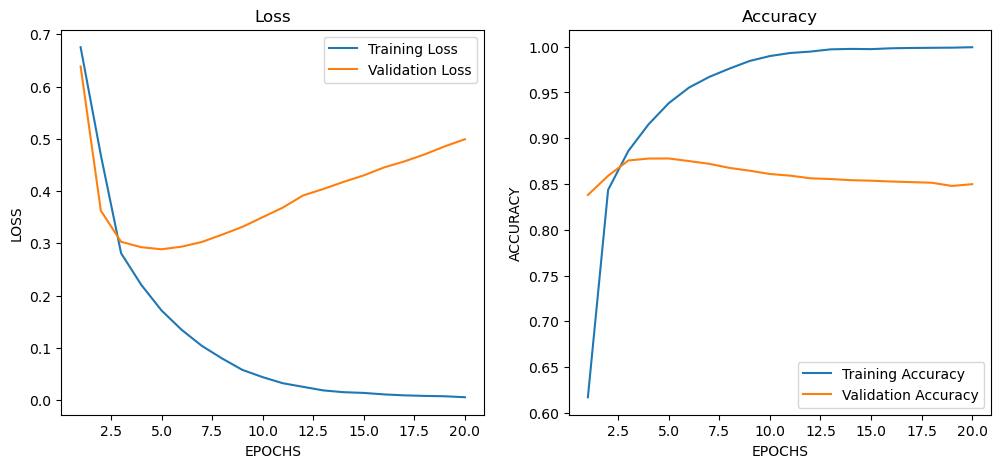

In [9]:
from helper_functions import plot_loss_acc_curves

plot_loss_acc_curves(model_history=score)

**Dangerous Overfitting**